In [2]:
import sys

sys.path.append("..")  # Add parent directory to path

import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from ldm.models.autoencoder import AutoencoderKL
from ldm.data.mnist import MNISTWrapper
from omegaconf import OmegaConf

In [23]:
def load_model_from_config(config_path, checkpoint_path):
    """Load model with config and checkpoint"""
    config = OmegaConf.load(config_path)
    model_config = config.model.params

    model = AutoencoderKL.load_from_checkpoint(
        checkpoint_path,
        ddconfig=model_config.ddconfig,
        lossconfig=model_config.lossconfig,
        embed_dim=model_config.embed_dim,
    )
    model.eval()
    return model


def get_test_samples(n_samples=8):
    """Get n_samples test images from MNIST"""
    transform = torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize(mean=[-1.0], std=[2.0]),
        ]
    )

    test_dataset = torchvision.datasets.MNIST(
        root="../data/mnist", train=False, download=True, transform=transform
    )
    test_loader = torch.utils.data.DataLoader(
        test_dataset, batch_size=n_samples, shuffle=True
    )
    images, _ = next(iter(test_loader))
    return images


def plot_comparison(model, kl_weight=None, n_samples=8):
    """Plot real vs reconstructed vs random samples with KL weight displayed."""
    # Get test images
    real_images = get_test_samples(n_samples)

    # Get reconstructions and random samples
    with torch.no_grad():
        # Reconstructions
        reconstructions, _ = model(real_images)

        # Random samples
        z = torch.randn(n_samples, model.embed_dim, 7, 7)
        random_samples = model.decode(z)

    # Plot
    fig, axes = plt.subplots(3, n_samples, figsize=(2 * n_samples, 6))
    title_str = "Real vs Encoded/Decoded vs Random Samples"
    if kl_weight is not None:
        title_str += f" (KL weight = {kl_weight})"
    plt.suptitle(title_str)

    for i in range(n_samples):
        # Real
        axes[0, i].imshow(real_images[i, 0].detach().cpu(), cmap="gray")
        axes[0, i].axis("off")
        if i == 0:
            axes[0, i].set_ylabel("Real")

        # Reconstruction
        axes[1, i].imshow(reconstructions[i, 0].detach().cpu(), cmap="gray")
        axes[1, i].axis("off")
        if i == 0:
            axes[1, i].set_ylabel("Reconstructed")

        # Random
        axes[2, i].imshow(random_samples[i, 0].detach().cpu(), cmap="gray")
        axes[2, i].axis("off")
        if i == 0:
            axes[2, i].set_ylabel("Random p(z)")

    plt.tight_layout()
    plt.show()

In [24]:
models = [
    {
        "config_path": "../configs/autoencoder/autoencoder_kl_8x8x64_mnist_gpu.yaml",
        "checkpoint_path": "../logs/2024-12-06T08-37-33_autoencoder_kl_8x8x64_mnist_gpu/checkpoints/epoch=000018.ckpt",
        "kl_weight": 0.000001,
    },
    {
        "config_path": "../configs/autoencoder/autoencoder_kl_8x8x64_mnist_gpu.yaml",
        "checkpoint_path": "../logs/2024-12-07T09-19-55_autoencoder_kl_8x8x64_mnist_gpu/checkpoints/epoch=000018.ckpt",
        "kl_weight": 0.1,
    },
    {
        "config_path": "../configs/autoencoder/autoencoder_kl_8x8x64_mnist_gpu.yaml",
        "checkpoint_path": "../logs/2024-12-07T12-15-34_autoencoder_kl_8x8x64_mnist_gpu/checkpoints/epoch=000017.ckpt",
        "kl_weight": 0.25,
    },
    {
        "config_path": "../configs/autoencoder/autoencoder_kl_8x8x64_mnist_gpu.yaml",
        "checkpoint_path": "../logs/2024-12-07T10-15-57_autoencoder_kl_8x8x64_mnist_gpu/checkpoints/epoch=000019.ckpt",
        "kl_weight": 0.5,
    },
    {
        "config_path": "../configs/autoencoder/autoencoder_kl_8x8x64_mnist_gpu.yaml",
        "checkpoint_path": "../logs/2024-12-07T09-56-26_autoencoder_kl_8x8x64_mnist_gpu/checkpoints/epoch=000017.ckpt",
        "kl_weight": 1,
    },
]

making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 64, 7, 7) = 3136 dimensions.
making attention of type 'vanilla' with 512 in_channels


/Users/lapuerta/miniconda3/envs/ldm/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/lapuerta/miniconda3/envs/ldm/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/lapuerta/miniconda3/envs/ldm/lib/python3.12/site-packages/taming/modules/losses/lpips.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code dur

loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth


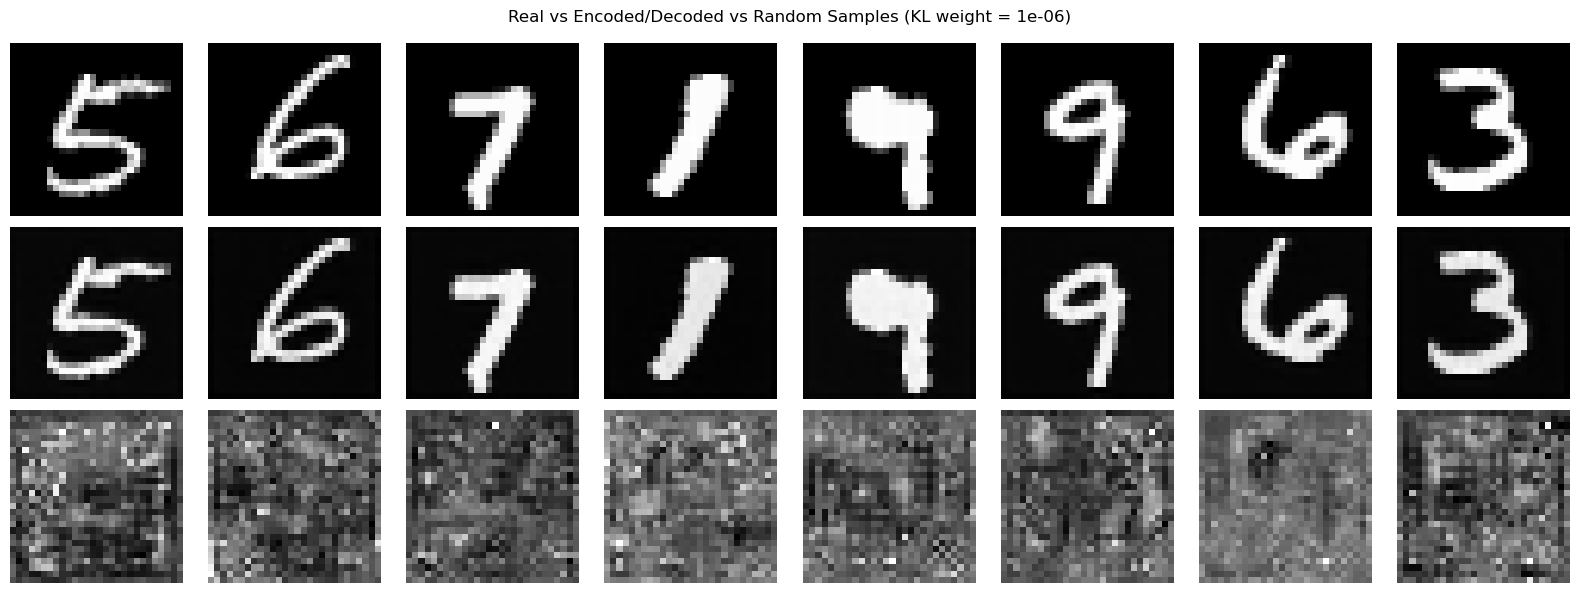

In [25]:
model_info = models[0]
model = load_model_from_config(model_info["config_path"], model_info["checkpoint_path"])
plot_comparison(model, kl_weight=model_info["kl_weight"])

making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 64, 7, 7) = 3136 dimensions.
making attention of type 'vanilla' with 512 in_channels
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth


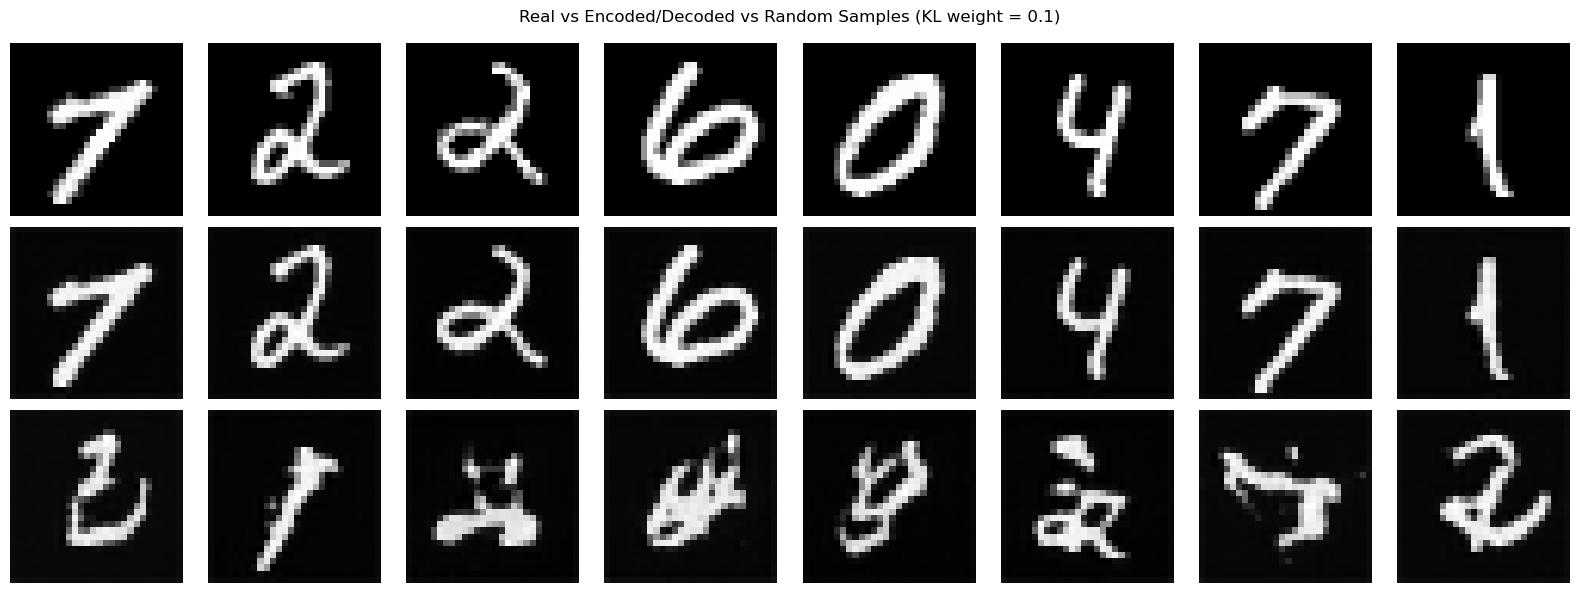

In [26]:
model_info = models[1]
model = load_model_from_config(model_info["config_path"], model_info["checkpoint_path"])
plot_comparison(model, kl_weight=model_info["kl_weight"])

making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 64, 7, 7) = 3136 dimensions.
making attention of type 'vanilla' with 512 in_channels
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth


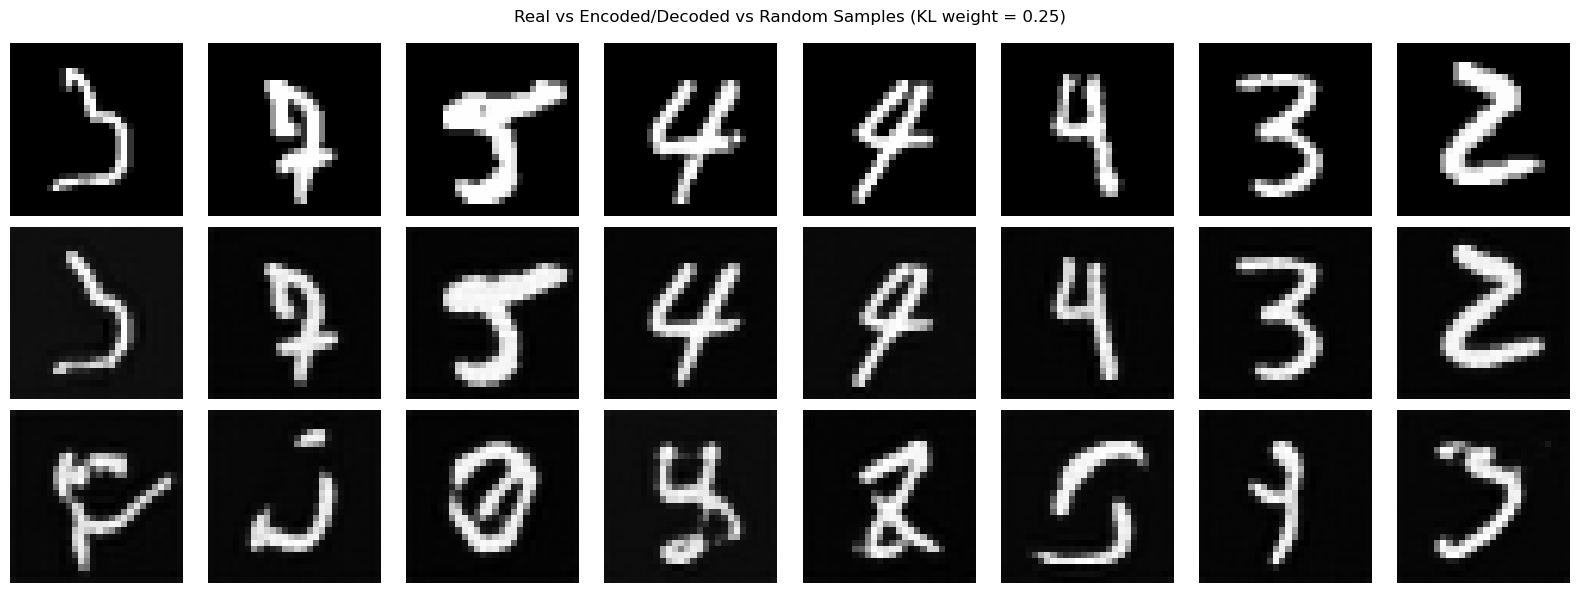

In [27]:
model_info = models[2]
model = load_model_from_config(model_info["config_path"], model_info["checkpoint_path"])
plot_comparison(model, kl_weight=model_info["kl_weight"])

making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 64, 7, 7) = 3136 dimensions.
making attention of type 'vanilla' with 512 in_channels
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth


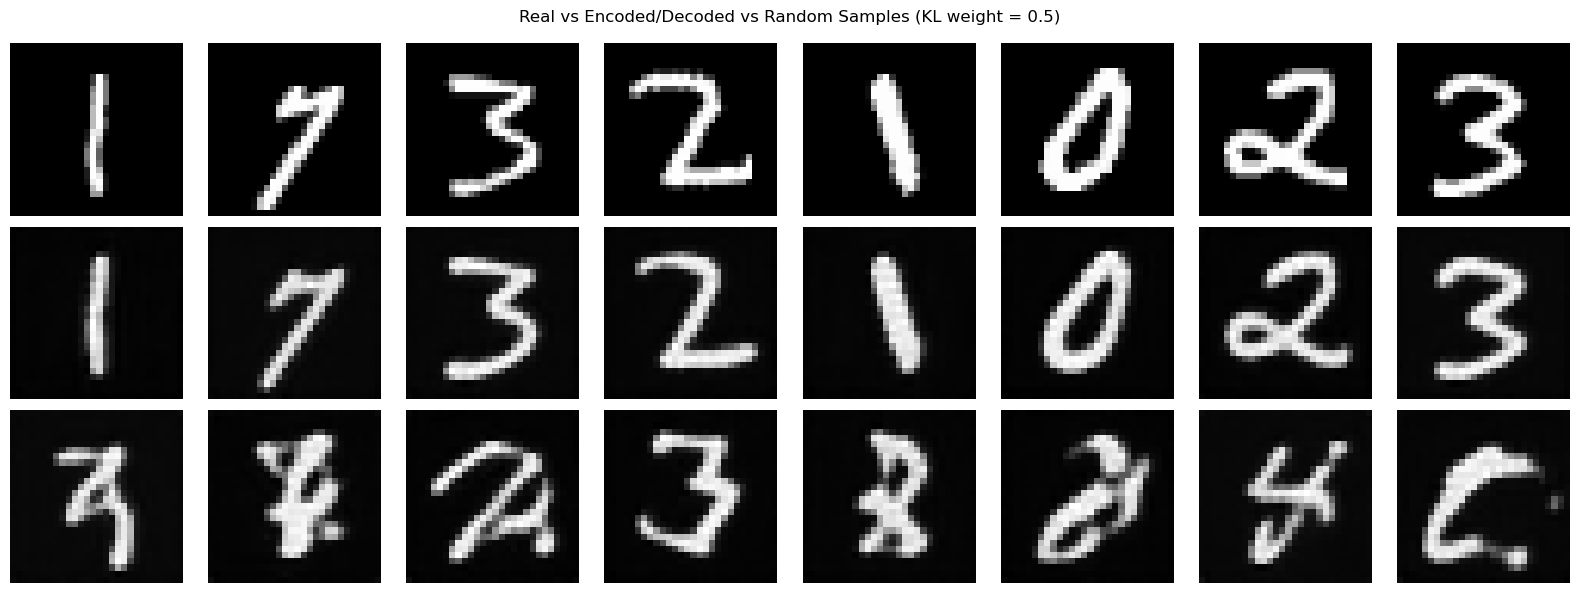

In [28]:
model_info = models[3]
model = load_model_from_config(model_info["config_path"], model_info["checkpoint_path"])
plot_comparison(model, kl_weight=model_info["kl_weight"])

making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 64, 7, 7) = 3136 dimensions.
making attention of type 'vanilla' with 512 in_channels
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth


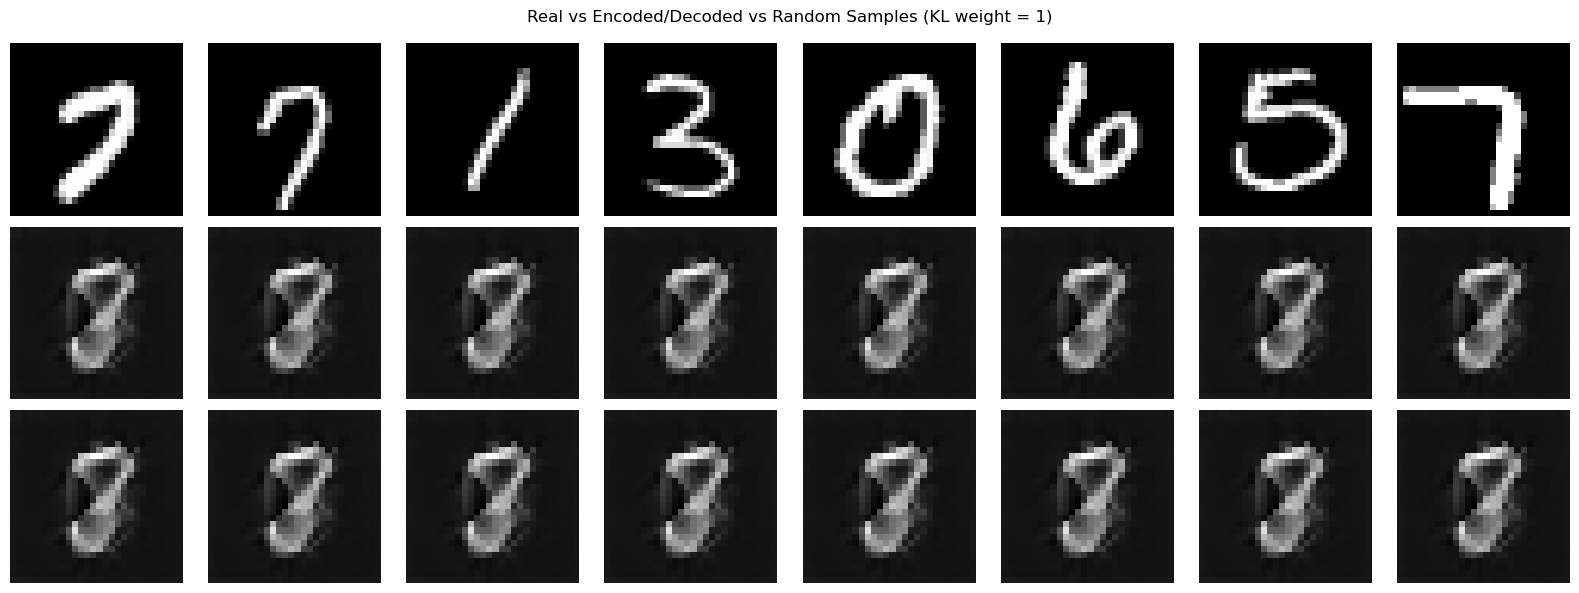

In [29]:
model_info = models[4]
model = load_model_from_config(model_info["config_path"], model_info["checkpoint_path"])
plot_comparison(model, kl_weight=model_info["kl_weight"])